IMPORTING THE REQUIRED LIBRARIES

In [3]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from wordcloud import WordCloud

In [4]:
train_tweets = pd.read_csv('./train.csv',skipinitialspace=True)
test_tweets = pd.read_csv('./test.csv',skipinitialspace=True)

In [5]:
train_tweets = train_tweets[['label','tweet']]
test = test_tweets['tweet']

EXPLORATORY DATA ANALYSIS

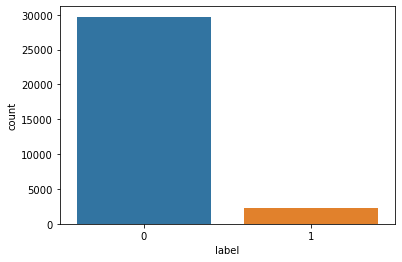

In [6]:
sns.countplot(x= 'label',data = train_tweets)


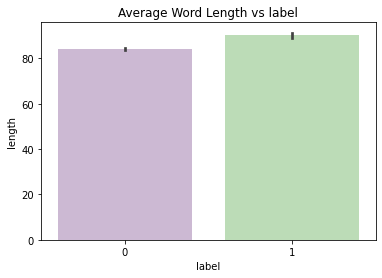

In [7]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets,palette='PRGn')
plt.title('Average Word Length vs label')
plt.show()

DATA PRE-PROCESSING AND FEATURE ENGINEERING

In [8]:
def text_processing(tweet):
    
    #Removal of punctuations(hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_tweet.append(lem.lemmatize(word,'v'))
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [63]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [64]:
train_tweets.head()

,label,tweet,length,tweet_list
0,0,@user when a father is dysfunctional and is so...,101,"[father, dysfunctional, selfish, drag, kid, dy..."
1,0,@user @user thanks for #lyft credit i can't us...,122,"[thank, lyft, credit, ca, use, cause, offer, w..."
2,0,bihday your majesty,19,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time]"
4,0,factsguide: society now #motivation,38,"[factsguide, society, motivation]"


NOW LET'S STITCH THESE TOKENS BACK TOGETHER

In [65]:
tokenized_tweet = train_tweets['tweet_list']
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
train_tweets['tweet_list'] = tokenized_tweet        

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
tokenized_tweet = test_tweets['tweet_list']
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
test_tweets['tweet_list'] = tokenized_tweet  

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
test_tweets.head()

,id,tweet,tweet_list
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...
1,31964,@user #white #supremacists want everyone to se...,white supremacists want everyone see new movie
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal acne altwaystoheal healthy heal
3,31966,is the hp and the cursed child book up for res...,hp curse child book reservations already yes h...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday amaze hilarious nephew eli ahmir uncle ...


VISUALIZATION WORDS USED IN NON RACIST OR POSITIVE TWEETS 

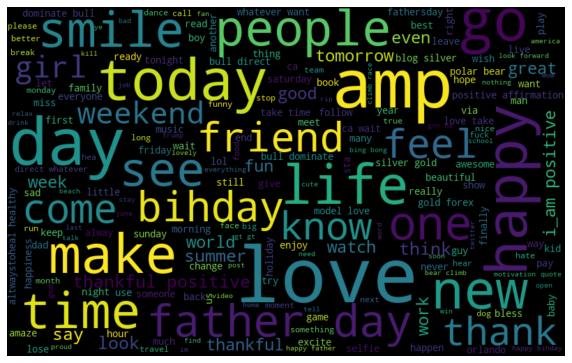

In [68]:
normal_words =' '.join([str(text) for text in train_tweets['tweet_list'][train_tweets['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


VISUALIZATION WORDS USED IN RACIST OR NEGATIVE TWEETS

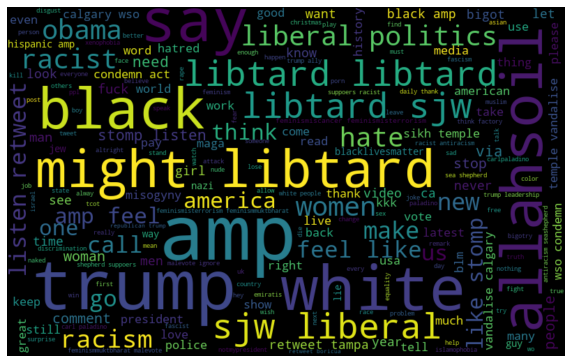

In [69]:
negitive_words =' '.join([text for text in train_tweets['tweet_list'][train_tweets['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negitive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [70]:
X = train_tweets['tweet_list']
Y = train_tweets['label']
test = test_tweets['tweet_list']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

USING BAG-OF-WORDS TECHNIQUES FOR VECTORIZATION AND
NAIVE BAYES CLASSIFIER MODEL

In [72]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])  # integer counts to weighted TF-IDF scores
      # train on TF-IDF vectors w/ Naive Bayes classifier

pipeline.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x0000025A96290558>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

MODEL VALIDATION

In [73]:
predictions = pipeline.predict(x_test)

print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97      6329
          1       0.15      1.00      0.26        64

avg / total       0.99      0.94      0.96      6393



UNDERSTANDING ACCURACY BY VISUALIZATION OF CONFUSION MATRIX 

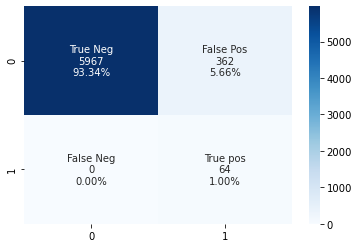

In [74]:
cm =confusion_matrix(predictions,y_test)

g_name = ['True Neg','False Pos','False Neg','True pos']
g_count = ["{0:0.0f}".format(value) for value in cm.flatten()]
g_per =  ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(g_name,g_count,g_per)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm,annot=labels, fmt='', cmap='Blues')

USING MODEL TO PREDICT FOR THE TEST DATA.

In [75]:
test_predictions = pipeline.predict(test)

In [76]:
test_pred_int = test_predictions.astype(np.int)
test_tweets['label'] = test_pred_int

In [77]:
test_tweets.head()

,id,tweet,tweet_list,label
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...,0
1,31964,@user #white #supremacists want everyone to se...,white supremacists want everyone see new movie,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal acne altwaystoheal healthy heal,0
3,31966,is the hp and the cursed child book up for res...,hp curse child book reservations already yes h...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",bihday amaze hilarious nephew eli ahmir uncle ...,0


In [73]:
submission = test_tweets
submission.to_csv('Predectest_labels.csv', index=False)